### Read Data
Read data from csv file

In [466]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Read data from dataframe
df = pd.read_csv('../Student_Pass_Fail_Dataset.csv')
df.head()

,StudyHours,Attendance,PastScore,Internet,SleepHours,Passed
0,2,60,40,Yes,5,No
1,5,80,60,No,6,Yes
2,8,90,75,Yes,8,Yes
3,3,70,50,Yes,5,No
4,7,85,70,No,7,Yes


### Understand Data
Understand the data from dataframe (Check datatypes, missing values, patterns, etc)

In [467]:
# Check dataframe information
print('dataframe information')
print(df.info())
print('\n')

# Check dataframe row and column shape
print('dataframe row and column shape', df.shape)


dataframe information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudyHours  20 non-null     int64 
 1   Attendance  20 non-null     int64 
 2   PastScore   20 non-null     int64 
 3   Internet    20 non-null     object
 4   SleepHours  20 non-null     int64 
 5   Passed      20 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.1+ KB
None


dataframe row and column shape (20, 6)


In [468]:
# Check dataframe column datatype
print('dataframe column datatypes\n', df.dtypes)
print('\n')
# Check missing values
print('Missing values', df.isnull().sum())

dataframe column datatypes
 StudyHours     int64
Attendance     int64
PastScore      int64
Internet      object
SleepHours     int64
Passed        object
dtype: object


Missing values StudyHours    0
Attendance    0
PastScore     0
Internet      0
SleepHours    0
Passed        0
dtype: int64


### Process data
- Step 1: Handle missing values (Use fillna or dropna)
- Step 2: Encode data (Use label encoding when two category, If more then two use one hot encoding)
- Step 3: Scale data (Use standard scaler or minmax scaler)

In [469]:
# Step 1: No missing values in dataframe, Ignoring step 1.
# Step 2: Encode data (Using label encoding on columns with has two category in data)
encoder = LabelEncoder()
df['Internet'] = encoder.fit_transform(df['Internet'])
df['Passed'] = encoder.fit_transform(df['Passed'])
df.head()

,StudyHours,Attendance,PastScore,Internet,SleepHours,Passed
0,2,60,40,1,5,0
1,5,80,60,0,6,1
2,8,90,75,1,8,1
3,3,70,50,1,5,0
4,7,85,70,0,7,1


In [470]:
# Step 3: Scale data (Use standard scaler to convert data into standardize data).
# Note: Only scale those column which values are high or uneven.
scaler = StandardScaler()
features = ['StudyHours', 'Attendance', 'PastScore', 'SleepHours']
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])
df_scaled.head()

,StudyHours,Attendance,PastScore,Internet,SleepHours,Passed
0,-1.117889,-0.835645,-1.009480,1,-0.528480,0
1,-0.036061,0.345479,0.047567,0,-0.025166,1
2,1.045767,0.936040,0.840353,1,0.981462,1
3,-0.757279,-0.245083,-0.480957,1,-0.528480,0
4,0.685158,0.640760,0.576091,0,0.478148,1


### Split data
Split data for traning and testing. Use train_test_split to split data intp traning and testing.

In [471]:
# X is features and y is output
X = df_scaled[features]
y = df_scaled['Passed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test now contain the split data. all in form of pandas DataFrame/Series format.
print("X_train:\n", X_train.head())
print('\n')
print("X_test:\n", X_test.head())

X_train:
     StudyHours  Attendance  PastScore  SleepHours
8     1.406376    1.231321   1.104615    1.484776
5    -1.478498   -1.426207  -1.538004   -1.031794
11    0.324548    0.817928   0.681796    0.478148
3    -0.757279   -0.245083  -0.480957   -0.528480
18    1.766985    1.467546   1.633139    1.988090


X_test:
     StudyHours  Attendance  PastScore  SleepHours
0    -1.117889   -0.835645  -1.009480   -0.528480
17    1.406376    1.349434   1.368877    1.484776
15    0.685158    0.581703   0.523239    0.478148
1    -0.036061    0.345479   0.047567   -0.025166


In [472]:
print("y_train:\n", y_train.head())
print('\n')
print("y_test:\n", y_test.head())

y_train:
 8     1
5     0
11    1
3     0
18    1
Name: Passed, dtype: int64


y_test:
 0     0
17    1
15    1
1     1
Name: Passed, dtype: int64


### Train Model
Train model based on traning (X) and testing (y) data

In [473]:
# Using LogisticRegression algorithm model for training, Using X_train (Feature) and y_train (Output) for traning 
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Model Prediction
Predict model output from unseen data

In [474]:
model_prediction = model.predict(X_test)
print('model prediction based on unseen data', model_prediction)

model prediction based on unseen data [0 1 1 1]


### Model evaluation
Evaluate the model predicted output using evaluation metrics. Use model actual prediction and y_test as true value

In [475]:
classificationReport = classification_report(y_test, model_prediction)
confusionMetricsTable = confusion_matrix(y_test, model_prediction)
print("classificationReport:\n", classificationReport)
print("confusionMetricsTable:\n", confusionMetricsTable)      


classificationReport:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

confusionMetricsTable:
 [[1 0]
 [0 3]]


### Data Visualization
Generate the plot for comprehensive data visualization as part of analysis.

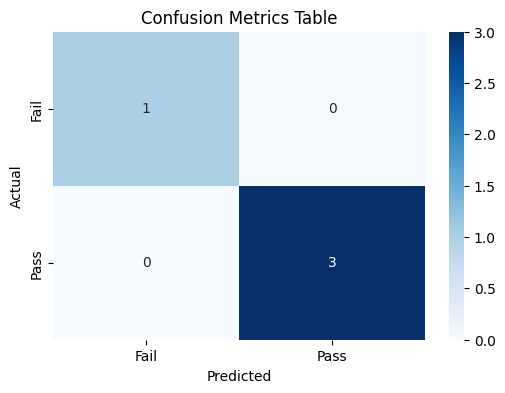

In [476]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusionMetricsTable, annot=True, fmt="d", cmap="Blues", xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.title('Confusion Metrics Table')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# heatmap plot with confusion matrics table is excellent for reporting your model's final performance because it visually summarizes:
# True Negatives (TN): 1 student correctly predicted to Fail.
# True Positives (TP): 3 students correctly predicted to Pass.
# False Positives (FP) & False Negatives (FN): 0 errors.

### Prediction from new data
Make prediction based on new data.

In [477]:
# Enter the input (Feature) from user
newStudyHours = float(input("Enter Study Hours"))
newAttendance = float(input("Enter Attendance"))
newPastScore = float(input("Enter Past Score"))
newSleepHours = float(input("Enter Sleep Hours"))

# Convert input into new dataframe
userInput_Df = pd.DataFrame([{
    'StudyHours': newStudyHours, 
    'Attendance': newAttendance, 
    'PastScore': newPastScore, 
    'SleepHours': newSleepHours
}])
# Convert dataframe into scaled dataframe for model prediction
userInput_Scaled = pd.DataFrame(
    scaler.transform(userInput_Df),
    columns=userInput_Df.columns
)
# Predict the output from newly entered data
model_prediction_result = model.predict(userInput_Scaled)[0] 
result = 'PASS' if model_prediction_result == 1 else 'FAIL' 
print(f'Based on entered data student is most likely be {result}')


Based on entered data student is most likely be PASS
